Denoising fMRI data and functional connectivity estimation
================================================

This is an example script for denoising and FC estimation from fMRI (1 subject) on data preprocessed in fmriprep with `--use-aroma` flag.




Step 1: Importing packages
------------------------------------------

In [38]:
%reset
%matplotlib inline

import pandas as pd
import numpy as np # the Python array package
import matplotlib.pyplot as plt  # the Python plotting package

from nilearn import datasets
from nilearn import plotting
from nilearn import input_data
from nilearn import signal
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
import nibabel as nib


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Step 2: Creating atlas
-------------------------------------------

In [40]:
# Loading Power ROIs coordinates

power = datasets.fetch_coords_power_2011()
power_coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T

# Creating masker file

power_spheres = input_data.NiftiSpheresMasker(
    seeds = power_coords, 
    #smoothing_fwhm = 6, 
    radius = 5,
    standardize = True)

Step 3: Loading data
-----------------------

In [41]:
# Loading functional data
top_dir = '/home/finc/Downloads/'
out_dir = '/home/finc/Downloads/LB_out/'

sub = 'sub-01'
ses = 'ses-1'
task = 'dualnback'

sub_dir = top_dir + sub + '/' + ses + '/func/'

#suffix = 'space-MNI152NLin2009cAsym_preproc.nii.gz'
suffix = 'space-MNI152NLin2009cAsym_variant-smoothAROMAnonaggr_preproc.nii.gz'

dual_data = sub_dir + sub + '_' + ses + '_task-' + task + '_bold_' + suffix

In [49]:
# Loading confound data

confounds_clean_path = sub_dir + 'confounds_ica_aroma.csv'
#confounds_clean_path = sub_dir + 'confounds_acompcor.csv'

conf = pd.read_csv(confounds_clean_path)
conf

#confound_data = sub_dir + sub + '_' + ses + '_task-' + task + '_bold_confounds.tsv'
#confounds = pd.read_csv(confound_data, delimiter='\t', encoding='utf-8')

#confounds_clean = confounds.drop(confounds.columns[[2, 3, 4, 5, 6]], axis = 1)

#np.savetxt(sub_dir + 'confounds_clean_no_ICA.csv', confounds_clean, delimiter=',')
#confounds_clean_path = sub_dir + 'confounds_clean_no_ICA.csv'
#print(confounds_clean.head(5)) #last N rows

,WhiteMatter,CSF,linear_trend
0,5094.498012,4980.443974,1
1,5078.671630,4975.986482,2
2,5083.771315,4972.987448,3
3,5095.731304,5001.873493,4
4,5100.411344,4998.028895,5
5,5099.142717,4999.117817,6
6,5091.135360,4943.428514,7
7,5088.385812,4970.949845,8
8,5094.760184,4974.980242,9
9,5090.548362,4959.246188,10


Step 4: Extracting timeseries
-----------------------------------------------

In [44]:
timeseries_power = power_spheres.fit_transform(dual_data, confounds = confounds_clean_path)

timeseries_power_filtered = signal.clean(timeseries_power,     
    low_pass = 0.08, 
    high_pass = 0.009)

timeseries_power_filtered.shape 

Step 5: Calculating correlation matrix
--------------------------------------------------------------

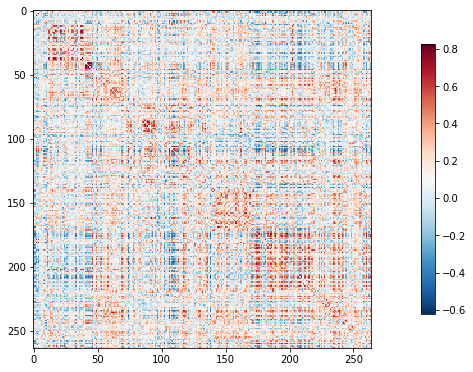

In [47]:
# Calculating static FC matrix

correlation_measure = ConnectivityMeasure(kind = 'correlation')
fc_power = correlation_measure.fit_transform([timeseries_power_filtered])[0]

# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(fc_power, 0)

# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(fc_power)

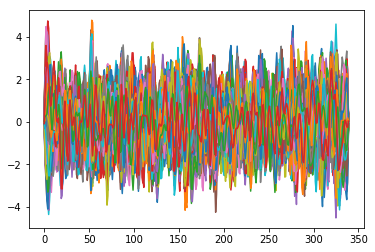